# Import all Libraries:

In [2]:
import numpy as np 
import pandas as pd 
import os
from tensorflow.keras import applications
import tensorflow as tf 

from tensorflow.keras.preprocessing import image
from tqdm import tqdm 
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [3]:
directory="C:/Users/Jahnavi/Desktop/Image_Captioning_using_Flickr_dataset-master/flickr dataset"
list_images=os.listdir(directory)

# Load Pretrained InceptionV3 Model:

In [4]:
model=applications.InceptionV3(weights="imagenet")

model.layers.pop()
model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

## Convert images into Features:

In [5]:
file=open('C:/Users/Jahnavi/Desktop/Image_Captioning_using_Flickr_dataset-master/flickr dataset/captions.txt','r')
file.close()
features=dict()
from tqdm import tqdm 
directory='C:/Users/Jahnavi/Desktop/Image_Captioning_using_Flickr_dataset-master/flickr dataset/Images'
list_images=os.listdir(directory)

for i in tqdm(range(8091)):
    path=os.path.join(directory,list_images[i])
    load_image=image.load_img(path, target_size=(299, 299))
    feature = image.img_to_array(load_image)
    feature = np.expand_dims(feature, axis=0)
    name=list_images[i].split('.')[0]
    feature=preprocess_input(feature)
    feature=model.predict(feature,verbose=0)
    feature = np.reshape(feature, feature.shape[1])
    features[name]=feature   

100%|████████████████████████████████████████████████████████████████████████████| 8091/8091 [1:17:51<00:00,  1.73it/s]


In [6]:
import pickle
pickle.dump(features, open( "features.p", "wb"))

In [7]:
import pickle
features=pickle.load( open( "features.p", "rb" ) )

## Reading Description of images from File:

In [8]:
file=open('C:/Users/Jahnavi/Desktop/Image_Captioning_using_Flickr_dataset-master/flickr dataset/captions.txt','r')

lines=file.readlines()
describtion=dict()
keys=[]
i=0
for line in lines[1:]:
    index=line.index(',') 
    if line[:index].split('.')[0] not  in keys:
        describtion[line[:index].split('.')[0]]=list()
    describtion[line[:index].split('.')[0]].append(line[index+1:])    
    keys=list(describtion.keys())
file.close()    

In [9]:

len(keys)

8091

## Cleaning Description:

In [10]:
import re
import string
def clean_desc(description,keys,length,start):
    re_punc = re.compile( '[%s]' % re.escape(string.punctuation))
    clean_dic={}
    for i in tqdm(range(start,length)):
        comments=description[keys[i]]
        cleaned_comment=[]
        for comment in comments:
            comment = re.sub('[^A-Za-z]+', ' ', comment)
            comment=[word.lower() for word in comment.split()]
            comment=[re_punc.sub('',w) for w in comment]
            
            words=[word for word in comment if len(word)>1]
            comment=' '.join(words)
    
            comments='startseq '+comment+' endseq'
            cleaned_comment.append(comments)
        clean_dic[keys[i]]=cleaned_comment
    return clean_dic

In [11]:
train_desc=clean_desc(describtion,keys,7000,0)
test_desc=clean_desc(describtion,keys,8000,7000)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 20207.48it/s]


In [12]:
len(test_desc)

1000

In [13]:
train_desc[keys[2]]

['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
 'startseq little girl is sitting in front of large painted rainbow endseq',
 'startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq',
 'startseq there is girl with pigtails sitting in front of rainbow painting endseq',
 'startseq young girl with pigtails painting outside in the grass endseq']

## Preparing Data For Training:

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
train_sentences=[]
train_keys=[]
for i in train_desc:
    train_keys.extend([i]*(len(train_desc[i])))
    train_sentences.extend(train_desc[i])


test_sentences=[]
test_keys=[]
for i in test_desc:
    test_keys.extend([i]*(len(test_desc[i])))
    test_sentences.extend(test_desc[i])
    

In [16]:
len(train_sentences)

35000

In [17]:
len(test_sentences)

5000

## Convert Words into Tokens:

In [18]:
words=[]

for i in train_sentences+test_sentences:
    words.extend(i.split())


In [19]:
from collections import Counter

word_dict=Counter(words)

word_keys=np.array(list(word_dict.keys()))
word_values=np.array(list(word_dict.values()))

In [20]:
indices=np.argsort(word_values)

In [21]:
word_ind=list(zip(list(word_keys[indices]),list(range(1,len(word_dict)+1))))
print(word_ind[0])

('wedgie', 1)


In [22]:
word_rank={}

word_rank.update(word_ind)


In [23]:
len(word_rank)

8376

In [24]:
train_sequences=[]
test_sequences=[]
for i in tqdm(train_sentences):
    l=[word_rank[j] for j in i.split()]
    train_sequences.append(l)
    
for i in tqdm(test_sentences):
    l=[word_rank[j] for j in i.split()]
    test_sequences.append(l)


100%|██████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 217071.76it/s]


In [25]:
max_len=0
for i in train_sequences:
    max_len=max(max_len,len(i))
print(max_len)

35


# Data Generator:

In [26]:
import random 
s=random.sample(list(range(0,2048)),2048)
def data_generator(train_keys,train_sequences,max_len,features,word_rank,s):
    c=0
    x1,x2,y=[],[],[]
    for i in range(len(train_keys)):
        img_feature=features[train_keys[i]]
        for j in range(1,len(train_sequences[i])):
            c+=1
            in_seq, out_seq =train_sequences[i][:j], train_sequences[i][j]
            
            in_seq = pad_sequences([in_seq], maxlen=max_len)[0]
            
            out_seq = tf.keras.utils.to_categorical([out_seq], num_classes=len(word_rank)+1)[0]
            #except:
             #   c-=1
              #  continue
            x1.append(img_feature)
            x2.append(in_seq)
            y.append(out_seq)
            if c==2048:
                y=np.array(y)
                yield [np.array(x1),np.array(x2)],y.astype(int)
                x1,x2,y=[],[],[]
                c=0
            
        
train_gen=data_generator(train_keys,train_sequences,max_len,features,word_rank,s)

valid_gen=data_generator(test_keys,test_sequences,max_len,features,word_rank,s)

In [27]:
lengths=[]
for i in train_sequences:
    lengths.append(len(i))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

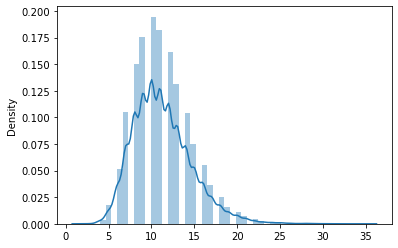

In [28]:
import seaborn as sns
sns.distplot(lengths)

In [29]:
max_len=max(lengths)

print(max_len)

35


In [30]:
train_sequences[4]

[8376, 8338, 8359, 8374, 8287, 8208, 8060, 8313, 8183, 5037, 8375]

In [31]:
train_steps=0
for i in train_gen:
    train_steps+=1
print(train_steps)

valid_steps=0
for i in valid_gen:
    valid_steps+=1
print(valid_steps)    

train_gen=data_generator(train_keys,train_sequences,max_len,features,word_rank,s)

valid_gen=data_generator(test_keys,test_sequences,max_len,features,word_rank,s)

174
25


# Caption_Model for Training:

In [32]:
tf.keras.backend.clear_session()
input1=tf.keras.layers.Input(shape=(2048,))
x1=tf.keras.layers.Dropout(0.2)(input1)
x2=tf.keras.layers.Dense(256,activation='relu')(x1)
    
input2=tf.keras.layers.Input(shape=(max_len,))
e1=tf.keras.layers.Embedding(len(word_rank)+1,128 ,mask_zero=True)(input2)
e2=tf.keras.layers.Dropout(0.2)(e1)    
e3=tf.keras.layers.LSTM(256 ,return_sequences=True,return_state=True)(e2)
e4=tf.keras.layers.LSTM(256)(e3)


d1=tf.keras.layers.add([x2,e4])
d2=tf.keras.layers.Dense(256,activation='relu')(d1)
output=tf.keras.layers.Dense(len(word_rank)+1,activation='softmax')(d2)
    
caption_model=tf.keras.models.Model(inputs=[input1,input2],outputs=output)
  
caption_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 35, 128)      1072256     ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 dropout_1 (Dropout)            (None, 35, 128)      0           ['embedding[0][0]']              
                                                                                              

In [ ]:
pip install pydot

In [ ]:
py -m pip install--upgrade pip

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(caption_model)

In [ ]:
caption_model.compile(loss='categorical_crossentropy', optimizer='RMSprop') 

# Trainig the Caption Model:

In [ ]:
for i in range(20):
    print("Epoch -"+str(i+1))
    train_gen=data_generator(train_keys,train_sequences,max_len,features,word_rank,s)

    caption_model.fit_generator(train_gen,epochs=1,steps_per_epoch=train_steps) 
    caption_model.save('/kaggle/working/model' + '.h5')

Epoch -1


C:\Users\Jahnavi\AppData\Local\Temp\ipykernel_12396\928504548.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  caption_model.fit_generator(train_gen,epochs=1,steps_per_epoch=train_steps)


174/174 [==============================] - 2090s 12s/step - loss: 5.4875
Epoch -2
174/174 [==============================] - 2974s 17s/step - loss: 4.6023
Epoch -3
149/174 [========================>.....] - ETA: 3:40 - loss: 4.1237

In [42]:
for i in range(10):
    print("Epoch -"+str(i+21))
    train_gen=data_generator(train_keys,train_sequences,max_len,features,word_rank,s)

    caption_model.fit_generator(train_gen,epochs=1,steps_per_epoch=train_steps) 
    caption_model.save('/kaggle/working/model' + '.h5')

Epoch -21
174/174 [==============================] - 88s 504ms/step - loss: 2.7382
Epoch -22
174/174 [==============================] - 88s 505ms/step - loss: 2.7111
Epoch -23
174/174 [==============================] - 88s 504ms/step - loss: 2.6861
Epoch -24
174/174 [==============================] - 89s 512ms/step - loss: 2.6619
Epoch -25
174/174 [==============================] - 87s 502ms/step - loss: 2.6374
Epoch -26
174/174 [==============================] - 88s 508ms/step - loss: 2.6104
Epoch -27
174/174 [==============================] - 88s 504ms/step - loss: 2.5899
Epoch -28
174/174 [==============================] - 88s 506ms/step - loss: 2.5656
Epoch -29
174/174 [==============================] - 87s 499ms/step - loss: 2.5468
Epoch -30
174/174 [==============================] - 88s 503ms/step - loss: 2.5302


In [43]:
for i in range(20):
    print("Epoch -"+str(i+31))
    train_gen=data_generator(train_keys,train_sequences,max_len,features,word_rank,s)

    caption_model.fit_generator(train_gen,epochs=1,steps_per_epoch=train_steps) 
    caption_model.save('/kaggle/working/model' + '.h5')

Epoch -31
174/174 [==============================] - 86s 494ms/step - loss: 2.5055
Epoch -32
174/174 [==============================] - 91s 523ms/step - loss: 2.4867
Epoch -33
174/174 [==============================] - 89s 511ms/step - loss: 2.4676
Epoch -34
174/174 [==============================] - 91s 526ms/step - loss: 2.4489
Epoch -35
174/174 [==============================] - 88s 503ms/step - loss: 2.4301
Epoch -36
174/174 [==============================] - 88s 508ms/step - loss: 2.4102
Epoch -37
174/174 [==============================] - 87s 500ms/step - loss: 2.3930
Epoch -38
174/174 [==============================] - 88s 507ms/step - loss: 2.3764
Epoch -39
174/174 [==============================] - 87s 500ms/step - loss: 2.3599
Epoch -40
174/174 [==============================] - 87s 502ms/step - loss: 2.3455
Epoch -41
174/174 [==============================] - 87s 502ms/step - loss: 2.3277
Epoch -42
174/174 [==============================] - 89s 509ms/step - loss: 2.3084
Epoc

In [30]:
pwd

'/kaggle/working'

## Load Model Weights:

In [28]:
caption_model.load_weights('model.h5')

## Convert Image using InceptionV3 Model:

In [30]:
 def convert_image(path):  
    load_image=image.load_img(path, target_size=(299, 299))
    feature = image.img_to_array(load_image)
    feature = np.expand_dims(feature, axis=0)
    name=list_images[i].split('.')[0]
    feature=preprocess_input(feature)
    feature=model.predict(feature,verbose=0)
    feature = np.reshape(feature, feature.shape[1])
    return feature

In [31]:
id_to_word = dict([(value, key) for key, value in word_rank.items()]) 

# Generate Caption of Image Using Caption Model:

In [32]:
def generate_text(max_len,caption_model,path,id_to_word):
    input_text='startseq '
    for i in range(max_len):
        seq=[]
        for i in input_text.split():
            seq.append(word_rank[i])
            
        padded=pad_sequences([seq],maxlen=max_len)
        
        image_feature=convert_image(path)
        image_feature=image_feature.reshape((1,2048))
        
        y_hat=caption_model.predict([image_feature,padded],verbose=0)
        y_hat=np.argmax(y_hat)
        
        word=id_to_word[y_hat]
        
        input_text+=' '+word
        if word=='endseq':
            break
    return ' '.join(input_text.split()[1:-1])   
        
  

In [33]:
import matplotlib.pyplot as plt 

import cv2
def load_image(path):
    img=cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Test Our Model:

enter a value :10



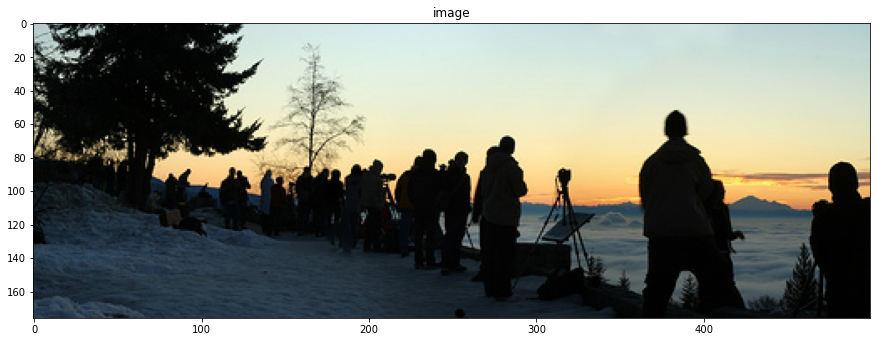

group of people are standing on the side of the mountain


In [39]:
n=int(input('enter a value :'))
path=list_images[n]
path='../input/flickr8k/Images/'+path
load_img=load_image(path)
    
fig,a =  plt.subplots(figsize=(15,15))
#fig.fig_size(15,15)
gen_text=generate_text(max_len,caption_model,path,id_to_word)
a.imshow(load_img)
plt.title('image')
print('')
    
plt.show()
print(gen_text)

enter a value :7020



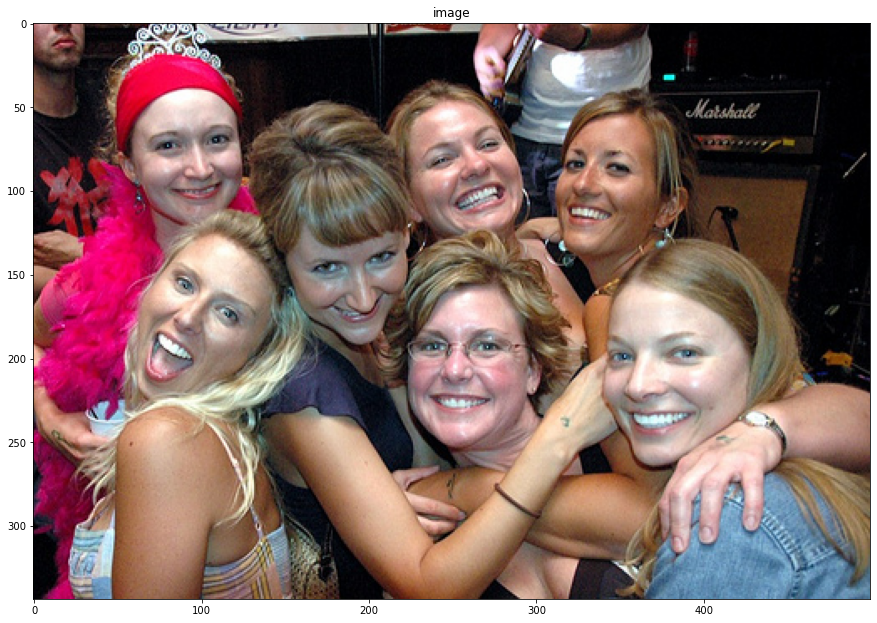

two girls are smiling and smile


In [40]:
n=int(input('enter a value :'))
path=list_images[n]
path='../input/flickr8k/Images/'+path
load_img=load_image(path)
    
fig,a =  plt.subplots(figsize=(15,15))
#fig.fig_size(15,15)
gen_text=generate_text(max_len,caption_model,path,id_to_word)
a.imshow(load_img)
plt.title('image')
print('')
    
plt.show()
print(gen_text)

enter a value :3128



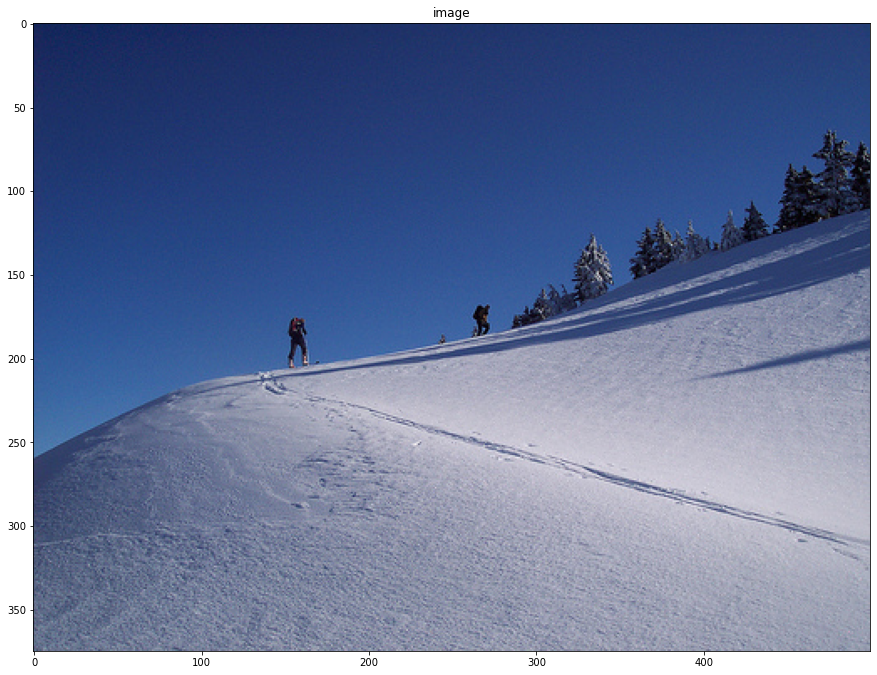

person is skiing down snowy hill


In [42]:
n=int(input('enter a value :'))
path=list_images[n]
path='../input/flickr8k/Images/'+path
load_img=load_image(path)
    
fig,a =  plt.subplots(figsize=(15,15))
#fig.fig_size(15,15)
gen_text=generate_text(max_len,caption_model,path,id_to_word)
a.imshow(load_img)
plt.title('image')
print('')
    
plt.show()
print(gen_text)

enter a value :4128



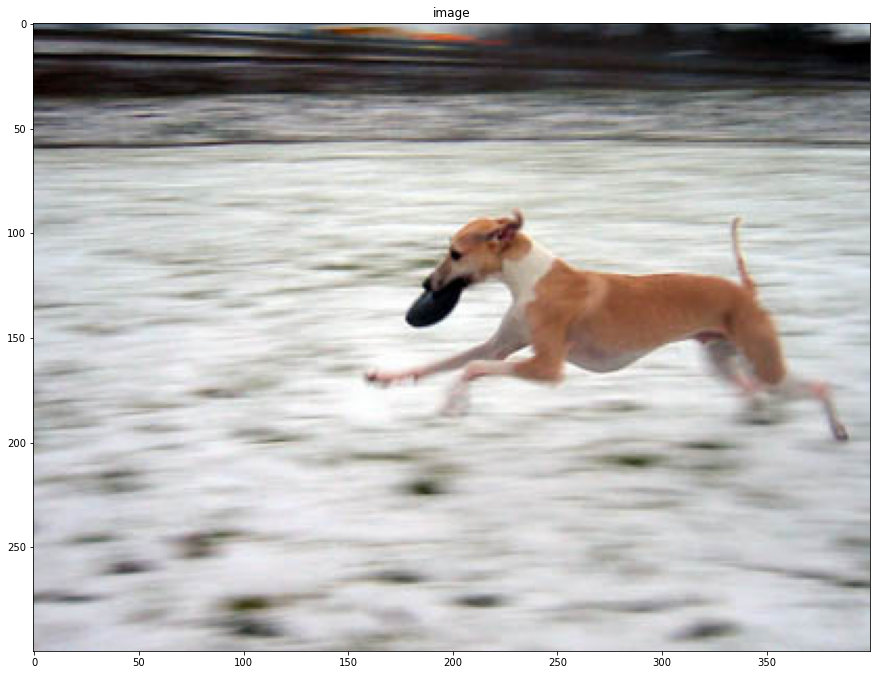

the dog is running through the field


In [44]:
n=int(input('enter a value :'))
path=list_images[n]
path='../input/flickr8k/Images/'+path
load_img=load_image(path)
    
fig,a =  plt.subplots(figsize=(15,15))

gen_text=generate_text(max_len,caption_model,path,id_to_word)
a.imshow(load_img)
plt.title('image')
print('')
    
plt.show()
print(gen_text)

enter a value :7500



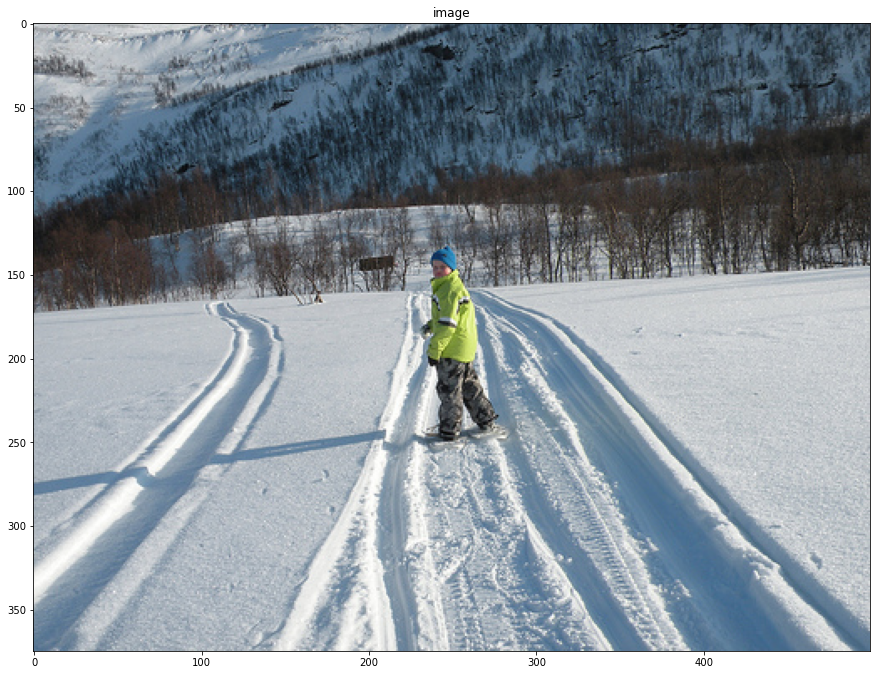

man in red jacket is walking on snow trail


In [45]:
n=int(input('enter a value :'))
path=list_images[n]
path='../input/flickr8k/Images/'+path
load_img=load_image(path)
    
fig,a =  plt.subplots(figsize=(15,15))

gen_text=generate_text(max_len,caption_model,path,id_to_word)
a.imshow(load_img)
plt.title('image')
print('')
    
plt.show()
print(gen_text)

enter a value :7564



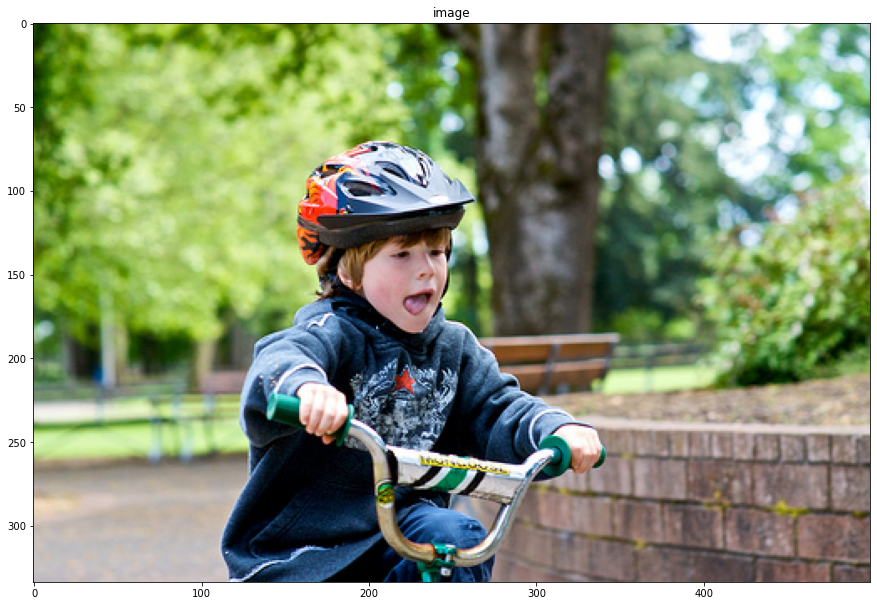

boy in blue shirt and helmet riding bike


In [46]:
n=int(input('enter a value :'))
path=list_images[n]
path='../input/flickr8k/Images/'+path
load_img=load_image(path)
    
fig,a =  plt.subplots(figsize=(15,15))
#fig.fig_size(15,15)
gen_text=generate_text(max_len,caption_model,path,id_to_word)
a.imshow(load_img)
plt.title('image')
print('')
    
plt.show()
print(gen_text)

enter a value :7685



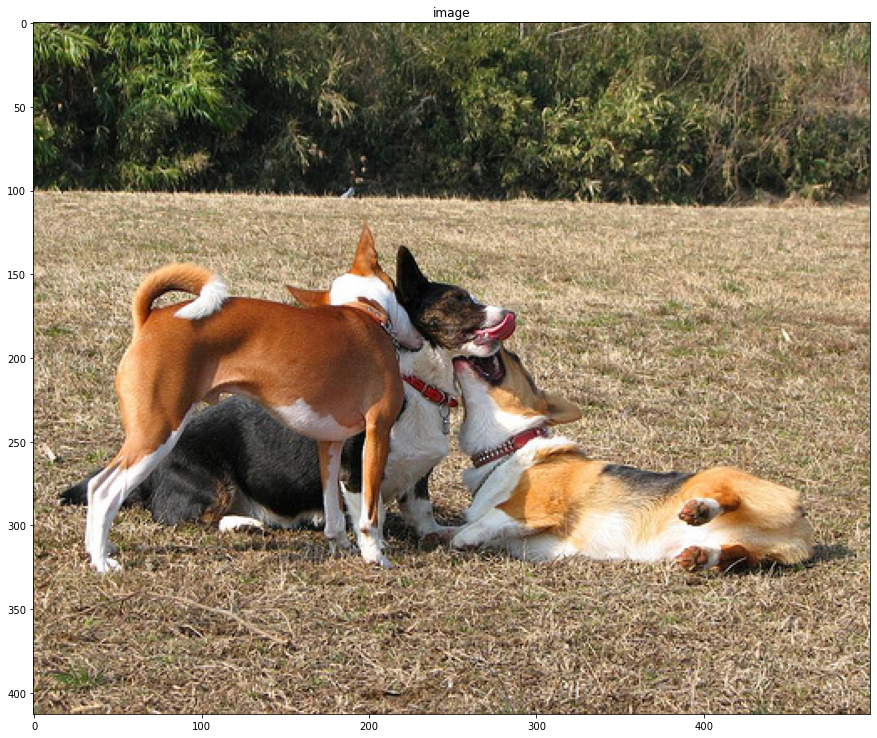

two dogs are playing with each other in the grass


In [47]:

n=int(input('enter a value :'))
path=list_images[n]
path='../input/flickr8k/Images/'+path
load_img=load_image(path)
    
fig,a =  plt.subplots(figsize=(15,15))
#fig.fig_size(15,15)
gen_text=generate_text(max_len,caption_model,path,id_to_word)
a.imshow(load_img)
plt.title('image')
print('')
    
plt.show()
print(gen_text)